# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

In [26]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
tf.__version__

'2.8.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [29]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [30]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [31]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [32]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

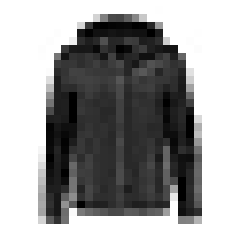

In [33]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [34]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [35]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [36]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [37]:
X_valid.shape

(5000, 28, 28)

In [38]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

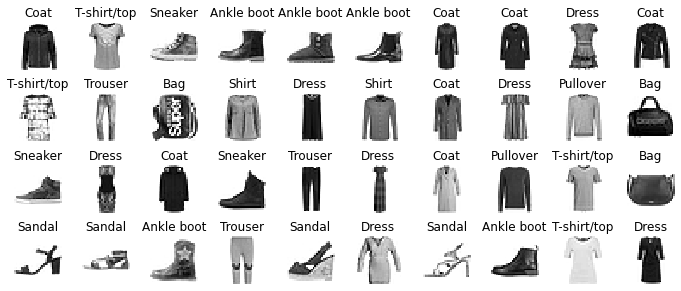

In [39]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [40]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [41]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [42]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [43]:
model.layers

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [45]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [46]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [47]:
model.get_layer(hidden1.name) is hidden1

True

In [48]:
weights, biases = hidden1.get_weights()

In [49]:
weights

array([[ 0.04172974, -0.04176679, -0.00471426, ..., -0.03348747,
        -0.05809057,  0.05736974],
       [-0.02208797,  0.05188626, -0.01447435, ...,  0.02840884,
        -0.04373507, -0.04799863],
       [ 0.0707265 , -0.01208209,  0.00699805, ...,  0.00683892,
        -0.01865258, -0.05168005],
       ...,
       [ 0.06703116, -0.0308013 ,  0.0140986 , ..., -0.05642536,
        -0.03243562, -0.04027011],
       [-0.03425171, -0.03784234, -0.00905392, ..., -0.04147681,
         0.05193378,  0.01966683],
       [ 0.05209453,  0.03315327, -0.05369952, ..., -0.03836141,
        -0.04105559,  0.06889965]], dtype=float32)

In [50]:
weights.shape

(784, 300)

In [51]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [52]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [53]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [54]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7221 - accuracy: 0.7650 - val_loss: 0.4962 - val_accuracy: 0.8340
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4914 - accuracy: 0.8278 - val_loss: 0.4433 - val_accuracy: 0.8540
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4452 - accuracy: 0.8438 - val_loss: 0.4279 - val_accuracy: 0.8496
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4177 - accuracy: 0.8533 - val_loss: 0.4196 - val_accuracy: 0.8538
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3981 - accuracy: 0.8603 - val_loss: 0.4152 - val_accuracy: 0.8578
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3814 - accuracy: 0.8655 - val_loss: 0.3822 - val_accuracy: 0.8700
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3666 - accuracy: 0.8695 - val_loss: 0.3636 - val_accuracy:

In [55]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [56]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [57]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

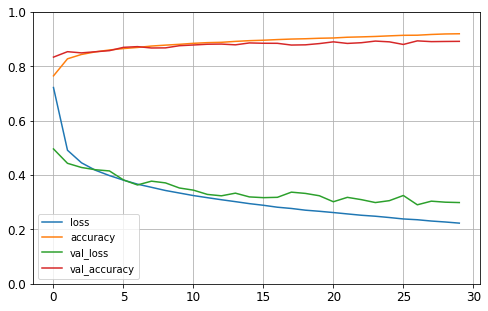

In [58]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [59]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3317 - accuracy: 0.8806


[0.3317340314388275, 0.8805999755859375]

In [60]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [61]:
y_pred = (model.predict(X_new) > 0.5).astype("int32")
y_pred

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [62]:
np.array(class_names)[y_pred]

array([['T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'Trouser'],
       ['T-shirt/top', 'T-shirt/top', 'Trouser', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top'],
       ['T-shirt/top', 'Trouser', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top']], dtype='<U11')

In [63]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

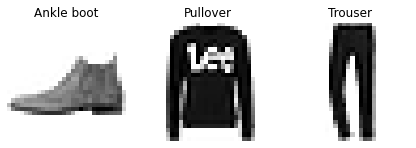

In [64]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.
#### 5) Use Batch Normalisation
#### 6) repeat with more layers
#### 7) apply on different datasets

#### 1) Plot Learning curves when using different optimizers

In [65]:
list_optimizers = ["rmsprop" , "adam" ] 
list_history = []
for optim in list_optimizers :
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optim,
                  metrics=["accuracy"])
    history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                        validation_data=(X_valid, y_valid))
    list_history.append(history)
    print('*********************************************************')
    

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4997 - accuracy: 0.8186 - val_loss: 0.3946 - val_accuracy: 0.8600
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3843 - accuracy: 0.8614 - val_loss: 0.3815 - val_accuracy: 0.8686
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3599 - accuracy: 0.8728 - val_loss: 0.3883 - val_accuracy: 0.8738
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3476 - accuracy: 0.8789 - val_loss: 0.3630 - val_accuracy: 0.8850
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3393 - accuracy: 0.8831 - val_loss: 0.4006 - val_accuracy: 0.8844
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3319 - accuracy: 0.8854 - val_loss: 0.4350 - val_accuracy: 0.8766
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3236 - accuracy: 0.8889 - val_loss: 0.4234 - val_accuracy:

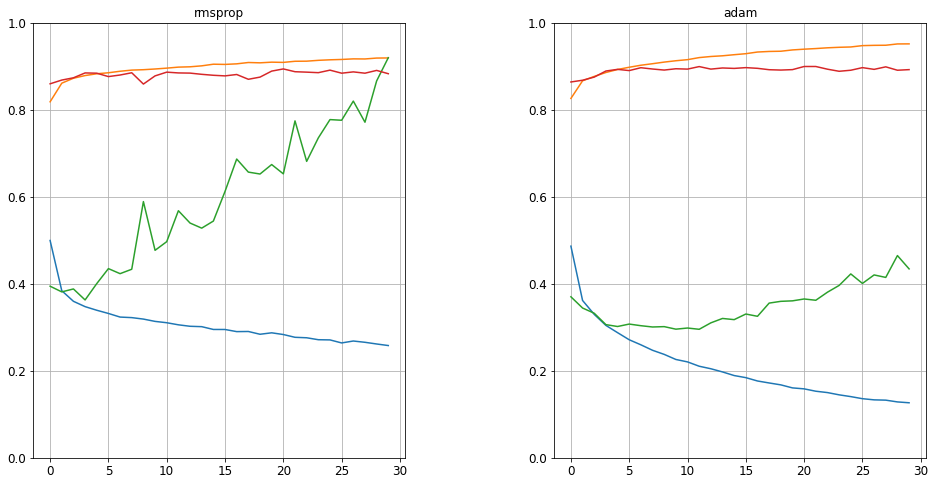

In [66]:
fig = plt.figure(figsize = (16,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 3):
    ax = fig.add_subplot(1, 2, i)
    ax.plot(pd.DataFrame(list_history[i-1].history))
    plt.title(list_optimizers[i-1])
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
plt.show()

#### 2) Plot Learning curves when using different batch size

In [69]:
list_history = []
for i in range(5,8) :
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])
    history = model.fit(X_train, y_train, batch_size = 2**i , epochs=30,
                        validation_data=(X_valid, y_valid))
    list_history.append(history)
    print('**************************************************************')

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7182 - accuracy: 0.7658 - val_loss: 0.5044 - val_accuracy: 0.8350
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4884 - accuracy: 0.8304 - val_loss: 0.4378 - val_accuracy: 0.8554
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4404 - accuracy: 0.8457 - val_loss: 0.4090 - val_accuracy: 0.8644
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4148 - accuracy: 0.8547 - val_loss: 0.3962 - val_accuracy: 0.8662
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3941 - accuracy: 0.8618 - val_loss: 0.3785 - val_accuracy: 0.8724
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3798 - accuracy: 0.8676 - val_loss: 0.3793 - val_accuracy: 0.8698
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3650 - accuracy: 0.8708 - val_loss: 0.3710 - val_accuracy:

In [68]:
len(list_history)

3

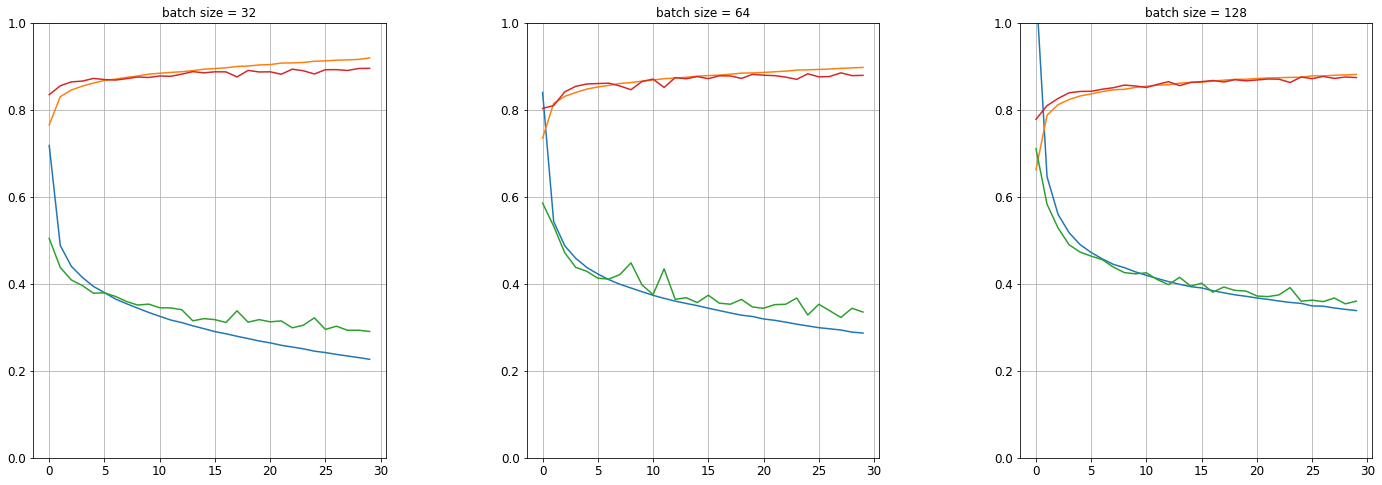

In [70]:
fig = plt.figure(figsize = (24,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 4):
    ax = fig.add_subplot(1, 3, i)
    ax.plot(pd.DataFrame(list_history[i-1].history))
    size = 2**(i+4)
    plt.title("batch size = " + str(size))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
plt.show()

#### 3) Plot Learning curves when using different number of epochs

In [64]:
list_history = []
for i in range(40,100,20) :
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])
    history = model.fit(X_train, y_train, batch_size = 32 , epochs= i,
                        validation_data=(X_valid, y_valid))
    list_history.append(history)
    print('**************************************************************')

Epoch 1/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7181 - accuracy: 0.7635 - val_loss: 0.5366 - val_accuracy: 0.8108
Epoch 2/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4881 - accuracy: 0.8305 - val_loss: 0.4454 - val_accuracy: 0.8516
Epoch 3/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4452 - accuracy: 0.8435 - val_loss: 0.4157 - val_accuracy: 0.8612
Epoch 4/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4171 - accuracy: 0.8542 - val_loss: 0.4023 - val_accuracy: 0.8648
Epoch 5/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3971 - accuracy: 0.8598 - val_loss: 0.3905 - val_accuracy: 0.8592
Epoch 6/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3801 - accuracy: 0.8661 - val_loss: 0.3766 - val_accuracy: 0.8722
Epoch 7/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3658 - accuracy: 0.8703 - val_loss: 0.3648 - val_accuracy:

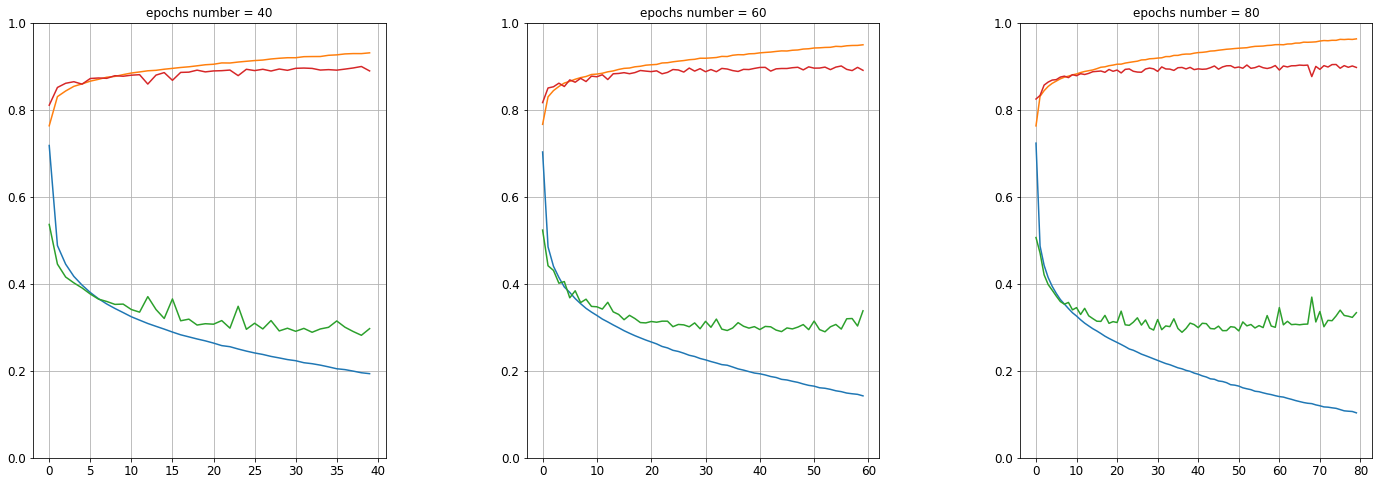

In [65]:
fig = plt.figure(figsize = (24,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 4):
    ax = fig.add_subplot(1, 3, i)
    ax.plot(pd.DataFrame(list_history[i-1].history))
    size = 40 + (i-1)*20
    plt.title("epochs number = " + str(size))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
plt.show()

#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.


In [17]:
 model_ = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(400, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])

In [20]:
model_.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])
history = model_.fit(X_train, y_train, batch_size = 32 , epochs= 30,
                        validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.7514 - accuracy: 0.7495 - val_loss: 0.5033 - val_accuracy: 0.8296
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5124 - accuracy: 0.8211 - val_loss: 0.4387 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4598 - accuracy: 0.8379 - val_loss: 0.4204 - val_accuracy: 0.8520
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4263 - accuracy: 0.8490 - val_loss: 0.3867 - val_accuracy: 0.8676
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4045 - accuracy: 0.8573 - val_loss: 0.3737 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3867 - accuracy: 0.8627 - val_loss: 0.3725 - val_accuracy: 0.8700
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3722 - accuracy: 0.8673 - val_loss: 0.3591 - val_accuracy:

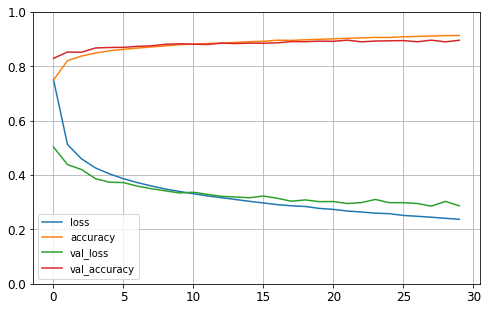

In [22]:

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### 5) Use Batch Normalisation

In [23]:
 model_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(400, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])

In [24]:
model_1.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])
history = model_1.fit(X_train, y_train, batch_size = 32 , epochs= 30,
                        validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5480 - accuracy: 0.8074 - val_loss: 0.3821 - val_accuracy: 0.8630
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4082 - accuracy: 0.8541 - val_loss: 0.3825 - val_accuracy: 0.8594
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3721 - accuracy: 0.8651 - val_loss: 0.3326 - val_accuracy: 0.8810
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3490 - accuracy: 0.8719 - val_loss: 0.3222 - val_accuracy: 0.8818
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3302 - accuracy: 0.8791 - val_loss: 0.3200 - val_accuracy: 0.8840
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3176 - accuracy: 0.8817 - val_loss: 0.3054 - val_accuracy: 0.8852
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3063 - accuracy: 0.8879 - val_loss: 0.3019 - val_accuracy:

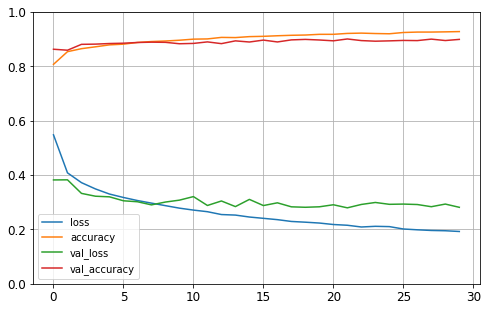

In [25]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()